In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatLogSlider
from matplotlib.animation import FuncAnimation, PillowWriter

# Fig1

<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:52: SyntaxWarning: invalid escape sequence '\o'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:52: SyntaxWarning: invalid escape sequence '\o'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/4130720275.py:51: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Storage and Loss Modulus $G^\prime_b(\omega)$ and $G^{\prime\prime}_b(\omega)$ with $G^\prime_m(\omega)$')
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/4130720275.py:52: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequency $\omega$ (rad/s)')


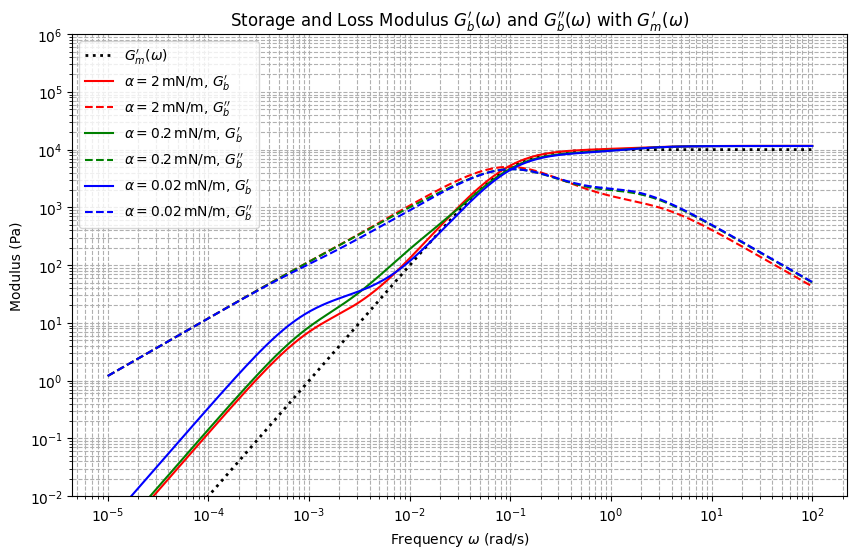

In [2]:
# Parameters
alpha_values = [2e-3, 0.2e-3, 0.02e-3]  # Convert mN/m to N/m
beta20 = 1e-5  # Convert mN/m to N/m
# Rv = 10e-6
Rv = 0.1e-6    # Convert micrometers to meters
eta_m = 1e5    # Pa·s
eta_d = 1e4    # Pa·s
# phi = 0.75
phi = 0.075
lambda_m = 10 # s
lambda_d = 0.1  # s

omega = np.logspace(-5, 2, num=500)  # rad/s

Gm_prime = (omega**2 * eta_m * lambda_m) / (1 + (omega * lambda_m)**2)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
labels_alpha = [r'$\alpha = 2\,\text{mN/m}$', r'$\alpha = 0.2\,\text{mN/m}$', r'$\alpha = 0.02\,\text{mN/m}$']

plt.loglog(omega, Gm_prime, color='k', linestyle=':', linewidth=2, label=r'$G^\prime_m(\omega)$')

for idx, alpha in enumerate(alpha_values):
    # Complex shear moduli of matrix and dispersed phases
    Gm_star = (1j * omega * eta_m) / (1 + 1j * omega * lambda_m)
    Gd_star = (1j * omega * eta_d) / (1 + 1j * omega * lambda_d)
    
    delta_G = Gd_star - Gm_star

    term1 = 19 * Gd_star + 16 * Gm_star
    term2 = 24 * (alpha / Rv) + 23 * Gd_star - 16 * Gm_star
    term3 = 24 * (alpha / Rv) + 23 * Gd_star + 32 * Gm_star
    term4 = 5 * Gd_star + 2 * Gm_star
    term5 = 2 * Gd_star + 3 * Gm_star
    term6 = Gd_star + Gm_star

    E1 = (beta20 / Rv) * term2
    D1 = (2 * beta20 / Rv) * term3

    E = delta_G * term1 + 4 * (alpha / Rv) * term4 + E1
    D = term5 * term1 + 40 * (alpha / Rv) * term6 + D1
    E_over_D = E / D

    Gb_star = Gm_star * (1 + 3 * phi * E_over_D) / (1 - 2 * phi * E_over_D)
    Gb_prime = Gb_star.real
    Gb_double_prime = Gb_star.imag

    plt.loglog(omega, Gb_prime, color=colors[idx], linestyle='-', label=labels_alpha[idx] + r', $G^\prime_b$')
    plt.loglog(omega, Gb_double_prime, color=colors[idx], linestyle='--', label=labels_alpha[idx] + r', $G^{\prime\prime}_b$')

plt.title('Storage and Loss Modulus $G^\prime_b(\omega)$ and $G^{\prime\prime}_b(\omega)$ with $G^\prime_m(\omega)$')
plt.xlabel('Frequency $\omega$ (rad/s)')
plt.ylabel('Modulus (Pa)')
plt.ylim(1e-2, 1e6) 
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


# Fig2

<>:72: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\o'
<>:72: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\o'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/661497388.py:72: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Influence of Interfacial Shear Modulus on $G^\prime_b(\omega)$ and $G^{\prime\prime}_b(\omega)$')
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/661497388.py:73: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequency $\omega$ (rad/s)')


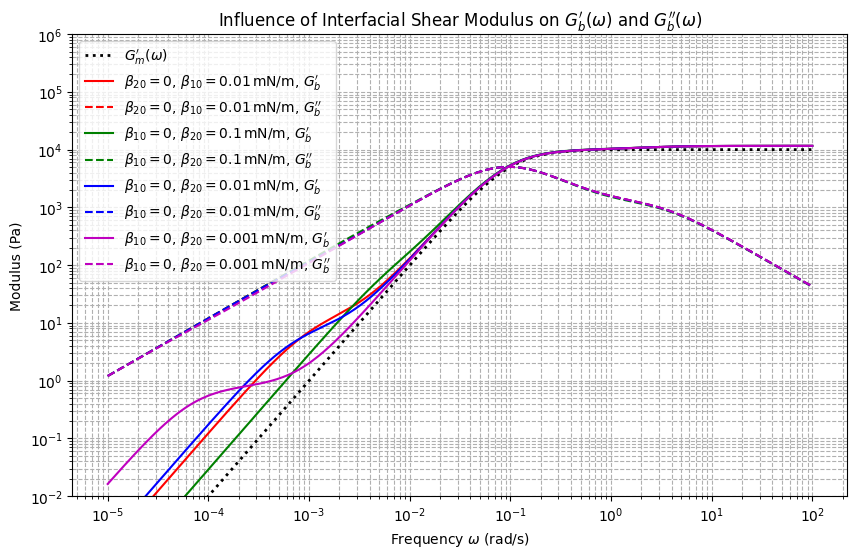

In [3]:
# Parameters
alpha = 2e-3  # Convert mN/m to N/m

omega = np.logspace(-5, 2, num=500)  # rad/s

Gm_star = (1j * omega * eta_m) / (1 + 1j * omega * lambda_m)
Gm_prime = Gm_star.real

# Initialize plot
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'm']
styles = ['-', '--', '-.', ':']
labels_cases = [
    r'$\beta_{20} = 0$, $\beta_{10} = 0.01\,\text{mN/m}$',
    r'$\beta_{10} = 0$, $\beta_{20} = 0.1\,\text{mN/m}$',
    r'$\beta_{10} = 0$, $\beta_{20} = 0.01\,\text{mN/m}$',
    r'$\beta_{10} = 0$, $\beta_{20} = 0.001\,\text{mN/m}$'
]

plt.loglog(omega, Gm_prime, color='k', linestyle=':', linewidth=2, label=r'$G^\prime_m(\omega)$')

# Define cases
cases = [
    {'beta_10': 0.01e-3, 'beta_20': 0},      
    {'beta_10': 0, 'beta_20': 0.1e-3},        
    {'beta_10': 0, 'beta_20': 0.01e-3},       
    {'beta_10': 0, 'beta_20': 0.001e-3}      
]

for idx, case in enumerate(cases):
    beta_10 = case['beta_10'] 
    beta_20 = case['beta_20'] 
    
    # Determine whether beta' or beta'' is zero
    if beta_20 == 0:
        beta_prime = beta_10
        beta_double_prime = 0
        beta_term = beta_prime / Rv
        # E1 and D1 terms
        E1 = beta_term * (24 * (alpha / Rv) + 23 * Gd_star - 16 * Gm_star)
        D1 = 2 * beta_term * (24 * (alpha / Rv) + 23 * Gd_star + 32 * Gm_star)
    else:
        # beta' = 0, beta'' = beta_20
        beta_prime = 0
        beta_double_prime = beta_20
        # Use E2 and D2 terms
        beta_term = beta_double_prime / Rv
        # E2 and D2 terms
        E1 = 2 * beta_term * (8 * (alpha / Rv) + 13 * Gd_star + 8 * Gm_star)
        D1 = 4 * beta_term * (8 * (alpha / Rv) + 13 * Gd_star + 12 * Gm_star)
    
    Gd_star = (1j * omega * eta_d) / (1 + 1j * omega * lambda_d)
    
    delta_G = Gd_star - Gm_star

    term1 = 19 * Gd_star + 16 * Gm_star
    term4 = 5 * Gd_star + 2 * Gm_star
    term5 = 2 * Gd_star + 3 * Gm_star
    term6 = Gd_star + Gm_star
    
    E = delta_G * term1 + 4 * (alpha / Rv) * term4 + E1
    D = term5 * term1 + 40 * (alpha / Rv) * term6 + D1
    E_over_D = E / D
    
    Gb_star = Gm_star * (1 + 3 * phi * E_over_D) / (1 - 2 * phi * E_over_D)
    Gb_prime = Gb_star.real
    Gb_double_prime = Gb_star.imag
    
    plt.loglog(omega, Gb_prime, color=colors[idx], linestyle=styles[0], label=labels_cases[idx] + r', $G^\prime_b$')
    plt.loglog(omega, Gb_double_prime, color=colors[idx], linestyle=styles[1], label=labels_cases[idx] + r', $G^{\prime\prime}_b$')

plt.title('Influence of Interfacial Shear Modulus on $G^\prime_b(\omega)$ and $G^{\prime\prime}_b(\omega)$')
plt.xlabel('Frequency $\omega$ (rad/s)')
plt.ylabel('Modulus (Pa)')
plt.ylim(1e-2, 1e6)  
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


# Fig3

<>:86: SyntaxWarning: invalid escape sequence '\o'
<>:87: SyntaxWarning: invalid escape sequence '\l'
<>:88: SyntaxWarning: invalid escape sequence '\l'
<>:86: SyntaxWarning: invalid escape sequence '\o'
<>:87: SyntaxWarning: invalid escape sequence '\l'
<>:88: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/4148695483.py:86: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Master Curves of $G\'_b(\omega)$ and $G\'\'_b(\omega)$ vs $\omega \\tau$')
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/4148695483.py:87: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\log(\omega \\tau)$ [rad/s]')
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_34533/4148695483.py:88: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log(G\'_b$ [Pa], $G\'\'_b$ [Pa])')


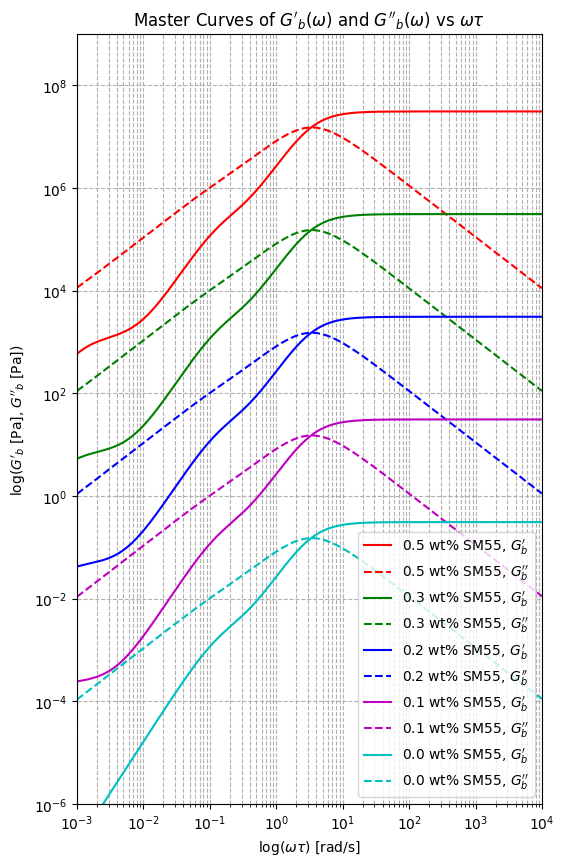

In [4]:
alpha = 2e-3    # Interfacial tension in N/m (2 mN/m)
Rv = 1e-7       # Average droplet radius in m (0.1 μm)
eta_m = 1e5     # Viscosity of matrix phase in Pa·s
eta_d = 1e4     # Viscosity of dispersed phase in Pa·s
phi = 0.075     # Volume fraction of dispersed phase
lambda_m = 0.3  # Relaxation time of matrix phase in s
lambda_d = 0.1  # Relaxation time of dispersed phase in s

# Frequency range
omega = np.logspace(-3, 4, num=500)  # rad/s, from 10^-3 to 10^4

# Characteristic time τ (assuming τ = 1 s for plotting ω τ)
tau = 1  # s

# Blends with SM55 content and shift factors C
blends = [
    {'SM55_wt%': 0.5, 'beta': 1e-5, 'C': 1e2},      # Blend 1
    {'SM55_wt%': 0.3, 'beta': 6e-6, 'C': 1},        # Blend 2
    {'SM55_wt%': 0.2, 'beta': 4e-6, 'C': 1e-2},     # Blend 3
    {'SM55_wt%': 0.1, 'beta': 2e-6, 'C': 1e-4},     # Blend 4
    {'SM55_wt%': 0.0, 'beta': 0.0, 'C': 1e-6}       # Blend 5 (uncompounded blend)
]

colors = ['r', 'g', 'b', 'm', 'c']
markers = ['o', 's', '^', 'D', 'v']

plt.figure(figsize=(6, 10))

for idx, blend in enumerate(blends):
    beta = blend['beta']  # Interfacial modulus in N/m
    C = blend['C']        # Vertical shift factor
    SM55_content = blend['SM55_wt%']  # SM55 content in wt%
    
    # Complex shear moduli of matrix and dispersed phases
    Gm_star = (1j * omega * eta_m) / (1 + 1j * omega * lambda_m)
    Gd_star = (1j * omega * eta_d) / (1 + 1j * omega * lambda_d)
    
    # E and D terms
    delta_G = Gd_star - Gm_star
    
    # Assuming beta' = beta, beta'' = 0
    beta_prime = beta
    beta_double_prime = 0
    beta_term = beta_prime / Rv
    
    # Common terms
    term1 = 19 * Gd_star + 16 * Gm_star
    term2 = 24 * (alpha / Rv) + 23 * Gd_star - 16 * Gm_star
    term3 = 24 * (alpha / Rv) + 23 * Gd_star + 32 * Gm_star
    term4 = 5 * Gd_star + 2 * Gm_star
    term5 = 2 * Gd_star + 3 * Gm_star
    term6 = Gd_star + Gm_star
    
    # E1 and D1 terms (since beta'' = 0)
    E1 = beta_term * term2
    D1 = 2 * beta_term * term3
    
    # E and D
    E = delta_G * term1 + 4 * (alpha / Rv) * term4 + E1
    D = term5 * term1 + 40 * (alpha / Rv) * term6 + D1
    
    # Ratio E/D
    E_over_D = E / D
    
    # Blend complex modulus
    Gb_star = Gm_star * (1 + 3 * phi * E_over_D) / (1 - 2 * phi * E_over_D)
    
    # Storage and loss moduli
    Gb_prime = Gb_star.real
    Gb_double_prime = Gb_star.imag
    
    # Shifted moduli
    Gb_prime_shifted = Gb_prime * C
    Gb_double_prime_shifted = Gb_double_prime * C
    
    # Plotting G'_b and G''_b
    plt.loglog(omega * tau, Gb_prime_shifted, color=colors[idx], linestyle='-', label=f"{SM55_content} wt% SM55, $G_{{b}}^{{\\prime}}$")
    plt.loglog(omega * tau, Gb_double_prime_shifted, color=colors[idx], linestyle='--', label=f"{SM55_content} wt% SM55, $G_{{b}}^{{\\prime\\prime}}$")


# Set x-axis and y-axis limits
plt.xlim(1e-3, 1e4)  # From 10^-3 to 10^4
plt.ylim(1e-6, 1e9)  # From 10^-6 to 10^9

# Formatting the plot
plt.title('Master Curves of $G\'_b(\omega)$ and $G\'\'_b(\omega)$ vs $\omega \\tau$')
plt.xlabel('$\log(\omega \\tau)$ [rad/s]')
plt.ylabel('$\log(G\'_b$ [Pa], $G\'\'_b$ [Pa])')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


# Animation of Storage and Loss Moduli with Varying Alpha

The above cell creates an interactive animation showing how the storage modulus (G'_b) and loss modulus (G''_b) of a blend change as the interfacial tension (α) varies. 

- The interfacial tension ranges from 10^-5 to 10^1 N/m



In [ ]:
# Fixed parameters
beta20 = 0  # N/m
Rv = 0.1e-6    # meters
eta_m = 1e5    # Pa·s
eta_d = 1e4    # Pa·s
phi = 0.20
lambda_m = 0.3  # s
lambda_d = 0.1  # s
omega = np.logspace(-5, 2, num=500)

# Matrix storage modulus
Gm_prime = (omega**2 * eta_m * lambda_m) / (1 + (omega * lambda_m)**2)

# Function to update the plot dynamically
def plot_Gb(alpha):
    plt.figure(figsize=(10, 6))

    # plt.loglog(omega, Gm_prime, color='k', linestyle=':', linewidth=2, label=r'$G^\prime_m(\omega)$')

    Gm_star = (1j * omega * eta_m) / (1 + 1j * omega * lambda_m)
    Gd_star = (1j * omega * eta_d) / (1 + 1j * omega * lambda_d)
    delta_G = Gd_star - Gm_star

    term1 = 19 * Gd_star + 16 * Gm_star
    term2 = 24 * (alpha / Rv) + 23 * Gd_star - 16 * Gm_star
    term3 = 24 * (alpha / Rv) + 23 * Gd_star + 32 * Gm_star
    term4 = 5 * Gd_star + 2 * Gm_star
    term5 = 2 * Gd_star + 3 * Gm_star
    term6 = Gd_star + Gm_star

    E1 = (beta20 / Rv) * term2
    D1 = (2 * beta20 / Rv) * term3

    E = delta_G * term1 + 4 * (alpha / Rv) * term4 + E1
    D = term5 * term1 + 40 * (alpha / Rv) * term6 + D1
    E_over_D = E / D

    Gb_star = Gm_star * (1 + 3 * phi * E_over_D) / (1 - 2 * phi * E_over_D)
    Gb_prime = Gb_star.real
    Gb_double_prime = Gb_star.imag

    plt.loglog(omega, Gb_prime, color='b', linestyle='-', label=r'$G^\prime_b(\omega)$')
    plt.loglog(omega, Gb_double_prime, color='r', linestyle='--', label=r'$G^{\prime\prime}_b(\omega)$')

    plt.title(
    f"$G^\\prime_b(\\omega)$ and $G^{{\\prime\\prime}}_b(\\omega)$ "
    f"(α={alpha:.3e} N/m)"
)
    plt.xlabel('Frequency $\omega$ (rad/s)')
    plt.ylabel('Modulus (Pa)')
    plt.ylim(1e-2, 1e6)
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

# Interactive slider for alpha
interact(plot_Gb, alpha=FloatLogSlider(value=2e-3, base=10, min=-5, max=2, step=0.1, description='α (N/m)'))

<>:49: SyntaxWarning: invalid escape sequence '\o'
<>:49: SyntaxWarning: invalid escape sequence '\o'
/var/folders/b2/ngd_31rj5kx3b102c6f9cjxw0000gn/T/ipykernel_15614/3692069595.py:49: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequency $\omega$ (rad/s)')


interactive(children=(FloatLogSlider(value=0.002, description='α (N/m)', max=2.0, min=-5.0), Output()), _dom_c…

<function __main__.plot_Gb(alpha)>

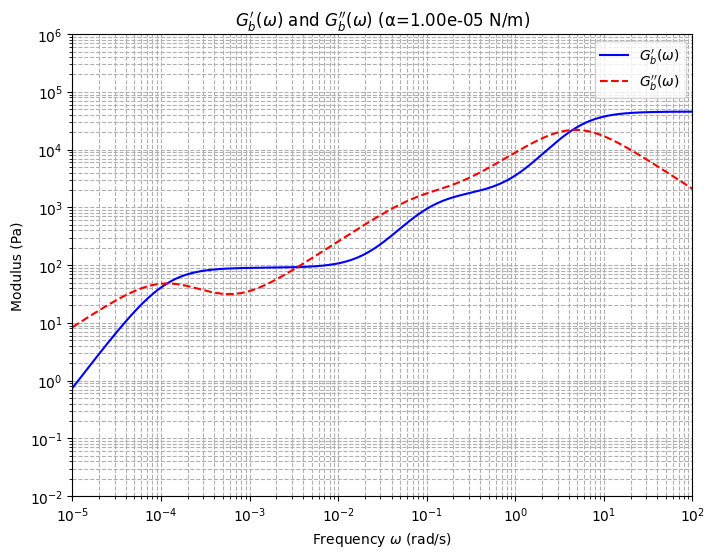

In [26]:
# Animation alpha values
alpha_vals = np.logspace(-5, 1, num=60)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

line_gb_prime, = ax.loglog([], [], 'b-', label=r"$G_b'(\omega)$")
line_gb_pp, = ax.loglog([], [], 'r--', label=r"$G_b''(\omega)$")
# line_gm, = ax.loglog(omega, Gm_prime, 'k:', linewidth=2, label=r"$G_m'(\omega)$")

ax.set_xlim(omega[0], omega[-1])
ax.set_ylim(1e-2, 1e6)
ax.set_xlabel(r"Frequency $\omega$ (rad/s)")
ax.set_ylabel("Modulus (Pa)")
ax.set_title("Moduli with varying α")
ax.grid(True, which="both", ls="--")
ax.legend()

def update(i):
    alpha = alpha_vals[i]
    term1 = 19 * Gd_star + 16 * Gm_star
    term2 = 24 * (alpha / Rv) + 23 * Gd_star - 16 * Gm_star
    term3 = 24 * (alpha / Rv) + 23 * Gd_star + 32 * Gm_star
    term4 = 5 * Gd_star + 2 * Gm_star
    term5 = 2 * Gd_star + 3 * Gm_star
    term6 = Gd_star + Gm_star

    E1 = (beta20 / Rv) * term2
    D1 = (2 * beta20 / Rv) * term3

    E = delta_G * term1 + 4 * (alpha / Rv) * term4 + E1
    D = term5 * term1 + 40 * (alpha / Rv) * term6 + D1
    E_over_D = E / D

    Gb_star = Gm_star * (1 + 3 * phi * E_over_D) / (1 - 2 * phi * E_over_D)
    Gb_prime = Gb_star.real
    Gb_double_prime = Gb_star.imag

    line_gb_prime.set_data(omega, Gb_prime)
    line_gb_pp.set_data(omega, Gb_double_prime)
    ax.set_title(rf"$G_b'(\omega)$ and $G_b''(\omega)$ (α={alpha:.2e} N/m)")

    return line_gb_prime, line_gb_pp

anim = FuncAnimation(fig, update, frames=len(alpha_vals), interval=100)


anim.save("moduli_alpha_variation.gif", writer=PillowWriter(fps=10))
